In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])


LinearRegression()

In [3]:
reg.coef_

array([0.5, 0.5])

In [4]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.coef_

array([0.34545455, 0.34545455])

In [5]:
reg.intercept_

0.13636363636363638

In [6]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01

### Classifier comparison

A comparison of several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

在合成数据集上对scikit-learn中的几个分类器进行比较。这个例子的目的是说明不同分类器的决策边界的性质。这应该被视为一种怀疑，因为这些例子所传达的直觉并不一定适用于真实的数据集。特别是在高维空间中，数据更容易线性分离，朴素贝叶斯和线性支持向量机等分类器的简单性可能会导致比其他分类器更好的泛化。图中以纯色显示训练点，半透明显示测试点。右下角显示测试集上的分类准确率。

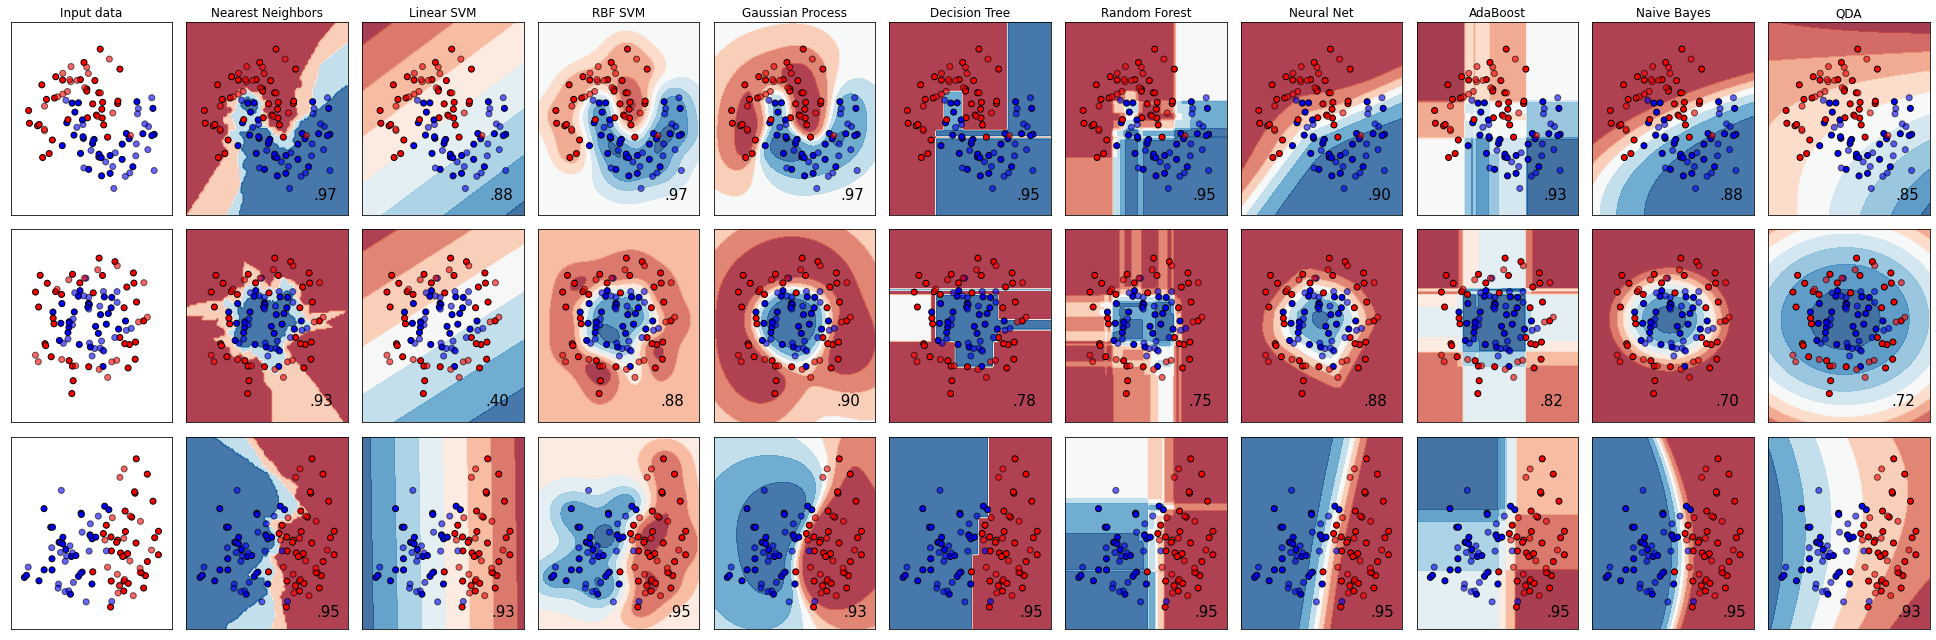

In [5]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

**Nearest Neighbors（最近邻）** 是一种机器学习算法，是一种非参数化的近邻分类算法，也被称为最近邻分类器。它的基本原理是，在训练阶段，算法会将所有的训练样本保存在内存中，形成一个样本空间。当有一个未知样本需要进行分类时，算法会计算该样本与所有训练样本之间的距离，并找到距离最近的k个训练样本。然后，根据这k个最近邻样本的类别，通过多数投票的方式确定未知样本的类别。其中，最近邻算法的关键参数是k值，即最近邻的个数。

sklearn.neighbors提供无监督和有监督的基于邻居的学习方法的功能。无监督最近邻是许多其他学习方法的基础，特别是流形学习和谱聚类。基于邻居的监督学习有两种类型：具有离散标签的数据的分类和具有连续标签的数据的回归。

最近邻方法背后的原理是找到距离新点最近的预定义数量的训练样本，并从中预测标签。样本数量可以是用户定义的常数（k 最近邻学习），也可以根据点的局部密度而变化（基于半径的邻域学习）。一般来说，距离可以是任何公制度量：标准欧几里得距离是最常见的选择。基于邻居的方法被称为非泛化机器学习方法，因为它们只是“记住”所有训练数据（可能转换为快速索引结构，例如 Ball Tree或KD Tree）。

尽管它很简单，但最近邻在大量分类和回归问题上取得了成功，包括手写数字和卫星图像场景。作为一种非参数方法，它在决策边界非常不规则的分类情况下通常会取得成功。

中的类sklearn.neighbors可以处理 NumPy 数组或 scipy.sparse矩阵作为输入。对于稠密矩阵，支持大量可能的距离度量。对于稀疏矩阵，支持任意 Minkowski 度量进行搜索。

有许多学习例程的核心依赖于最近邻居。一个例子是核密度估计，在密度估计部分讨论。

### 无监督最近邻

NearestNeighbors实现无监督的最近​​邻学习。它充当三种不同最近邻算法的统一接口：   
BallTree、KDTree和暴力算法基于sklearn.metrics.pairwise中例程。   
邻居搜索算法的选择是通过关键字控制的 'algorithm'，=['auto', 'ball_tree', 'kd_tree', 'brute']

基于邻居的分类是一种基于实例的学习或非泛化学习：它不试图构建一个通用的内部模型，而只是存储训练数据的实例。   
分类是通过每个点的最近邻居的简单多数投票来计算的：查询点被分配到在最近邻居中具有最多代表的数据类。   

scikit-learn实现了两种不同的最近邻分类器：KNeighborsClassifier基于每个查询点的k个最近邻进行学习，其中k是由用户指定的整数值。   RadiusNeighborsClassifier基于每个训练点固定半径内的邻居数量进行学习，其中r是由用户指定的浮点值。

KNeighborsClassifier中的k-邻居分类是最常用的技术。k值的最佳选择高度依赖于数据：通常较大的k值会抑制噪声的影响，但会使分类边界不那么明显。在数据未统一采样的情况下，RadiusNeighborsClassifier中的基于半径的邻居分类可能是更好的选择。    

用户指定一个固定的半径r，这样在稀疏的邻居中，点使用较少的最近邻进行分类。对于高维参数空间，由于所谓的“维数灾祸”，这种方法变得不那么有效。   

基本最近邻分类使用统一的权重：即，为查询点分配的值是根据最近邻的简单多数投票计算的。   

在某些情况下，最好对邻居进行加权，使较近的邻居对拟合贡献更多。这可以通过 weights 关键字来实现。   
默认值 weights = 'uniform' 为每个邻居分配统一的权重。   
weights = 'distance' 分配的权重与查询点距离的倒数成正比。或者，可以提供一个用户定义的函数来计算距离的权重。

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
    #We want to use a k-nearest neighbors classifier considering a neighborhood of 11 data points. 
)

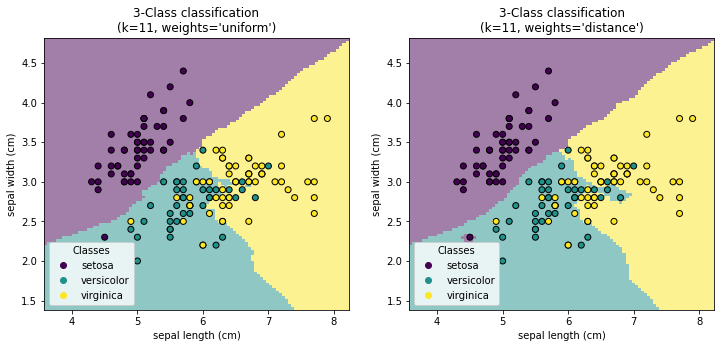

In [14]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    #we fit two classifiers with different values of the parameter weights=["uniform", "distance"]
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

###支持向量机 (SVM)
支持向量机的优点是：

+ 在高维空间中有效。

+ 在维度数大于样本数的情况下仍然有效。

+ 在决策函数中使用训练点的子集（称为支持向量），因此它也具有内存效率。

+ 通用：可以为决策函数指定不同的核函数。提供了通用内核，但也可以指定自定义内核。   

支持向量机的缺点包括：

+ 如果特征数量远大于样本数量，在选择核函数时要避免过度拟合，正则化项至关重要。

+ SVM 不直接提供概率估计，这些概率估计是使用昂贵的五倍交叉验证来计算的（请参阅下面的分数和概率）。

scikit-learn 中的支持向量机支持密集（numpy.ndarray并可通过 转换为numpy.asarray）和稀疏（任意scipy.sparse）样本向量作为输入。然而，要使用 SVM 对稀疏数据进行预测，它必须适合此类数据。为了获得最佳性能，请将 C 序numpy.ndarray（密集）或 scipy.sparse.csr_matrix（稀疏）与 一起使用dtype=float64。 

SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. It also lacks some of the attributes of SVC and NuSVC, like support_. LinearSVC uses squared_hinge loss and due to its implementation in liblinear it also regularizes the intercept, if considered. This effect can however be reduced by carefully fine tuning its intercept_scaling parameter, which allows the intercept term to have a different regularization behavior compared to the other features. The classification results and score can therefore differ from the other two classifiers.   
SVC和NuSVC是类似的方法，但接受稍微不同的参数集并具有不同的数学公式（请参阅数学公式部分）。另一方面， LinearSVC是线性核情况下支持向量分类的另一种（更快）实现。SVC它还缺少和的一些属性NuSVC，例如 support_。LinearSVC使用squared_hinge损失，并且由于它的实现，liblinear如果考虑的话，它也会规范截距。然而，可以通过仔细微调其 intercept_scaling参数来减少这种影响，这使得截距项与其他特征相比具有不同的正则化行为。因此，分类结果和分数可能与其他两个分类器不同。   
As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples):   
与其他分类器一样，SVC、NuSVC和 LinearSVC将两个数组作为输入：一个保存训练样本的形为(n_samples, n_features)数组X，以及一个形为(n_samples)的类标签为（字符串或整数）数组y：

In [8]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

拟合后，模型可用于预测新值：

In [9]:
clf.predict([[2., 2.]])

array([1])

SVM 决策函数（在数学公式中详细介绍）取决于训练数据的某个子集，称为支持向量。support_vectors_这些支持向量的一些属性可以在 属性、support_和中找到 n_support_：

In [10]:
# get support vectors
clf.support_vectors_
# get indices of support vectors
clf.support_
# get number of support vectors for each class
clf.n_support_

array([1, 1])

#### SVM1：最大间隔分离超平面
使用具有线性核的支持向量机分类器绘制两类可分离数据集中的最大间隔分离超平面。

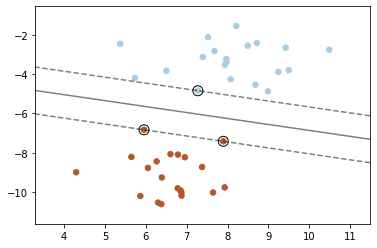

In [11]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

#### SVM2: 非线性支持向量机
使用带有 RBF 内核的非线性 SVC 执行二元分类。要预测的目标是输入的异或。

彩色图说明了 SVC 学习的决策函数。

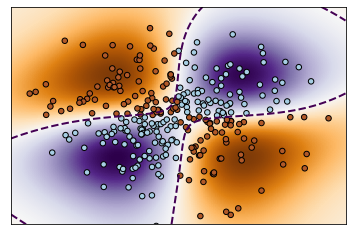

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")   #####gamma
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

#### SVM-Anova：具有单变量特征选择的 SVM
此示例演示如何在运行 SVC（支持向量分类器）之前执行单变量特征选择以提高分类分数。我们使用 iris 数据集（4 个特征）并添加 36 个非信息性特征。我们可以发现，当我们选择 10% 左右的特征时，我们的模型可以获得最佳性能。

In [13]:
import numpy as np

#加载数据
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

In [14]:
#创建管道
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(f_classif)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

In [15]:
#将交叉验证分数绘制为特征百分位数的函数
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

### 决策树
决策树（DT）是一种用于分类和回归的非参数监督学习方法。目标是创建一个模型，通过学习从数据特征推断出的简单决策规则来预测目标变量的值。树可以看作是分段常数近似。

例如，在下面的示例中，决策树从数据中学习，使用一组 if-then-else 决策规则来近似正弦曲线。树越深，决策规则越复杂，模型越拟合。

决策树的一些优点是：

+ 易于理解和解释。树木可以被形象化。

+ 需要很少的数据准备。其他技术通常需要数据标准化、创建虚拟变量并删除空白值。一些树和算法组合支持 缺失值。

+ 使用树（即预测数据）的成本是用于训练树的数据点数量的对数。

+ 能够处理数值数据和分类数据。但是，scikit-learn 实现目前不支持分类变量。其他技术通常专门用于分析仅具有一种变量类型的数据集。请参阅算法以获取更多信息。

+ 能够处理多输出问题。

+ 使用白盒模型。如果给定的情况在模型中是可观察到的，则该条件的解释很容易通过布尔逻辑来解释。相比之下，在黑盒模型中（例如，在人工神经网络中），结果可能更难以解释。

+ 可以使用统计测试来验证模型。这使得可以解释模型的可靠性。

+ 即使生成数据的真实模型在某种程度上违反了其假设，也表现良好。

决策树的缺点包括：

+ 决策树学习者可以创建过于复杂的树，而这些树不能很好地概括数据。这称为过度拟合。为了避免这个问题，需要采用剪枝、设置叶节点所需的最小样本数或设置树的最大深度等机制。

+ 决策树可能不稳定，因为数据的微小变化可能会导致生成完全不同的树。通过在集成中使用决策树可以缓解这个问题。

+ 决策树的预测既不是平滑的也不是连续的，而是分段常数近似，如上图所示。因此，他们不擅长推断。

+ 已知学习最优决策树的问题在最优性的几个方面甚至对于简单的概念来说都是 NP 完全的。因此，实用的决策树学习算法基于启发式算法，例如贪婪算法，其中在每个节点做出局部最优决策。此类算法不能保证返回全局最优决策树。这可以通过在集成学习器中训练多个树来缓解，其中特征和样本是通过替换随机采样的。

+ 有些概念很难学习，因为决策树不容易表达它们，例如异或、奇偶校验或多路复用器问题。

+ 如果某些类占主导地位，决策树学习器会创建有偏差的树。因此，建议在拟合决策树之前平衡数据集。


DecisionTreeClassifier是能够对数据集执行多类分类的类。

与其他分类器一样，DecisionTreeClassifier将两个数组作为输入：一个数组 X（稀疏或密集），其形状保存训练样本；以及一个整数值数组 Y（形状），保存训练样本的类标签：(n_samples, n_features)(n_samples,)

In [16]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

拟合后，模型可以用于预测样本的类别：

In [17]:
clf.predict([[2., 2.]])

array([1])

如果存在多个具有相同且最高概率的类，分类器将预测这些类中索引最低的类。

作为输出特定类别的替代方法，可以预测每个类别的概率，它是叶子中该类别的训练样本的分数：

In [18]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

DecisionTreeClassifier能够进行二元分类（标签为 [-1, 1]）和多类分类（标签为 [0, …, K-1]）。

使用 Iris 数据集，我们可以构建一棵树，如下所示：

In [19]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

训练完成后，您可以使用以下函数绘制树plot_tree：

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

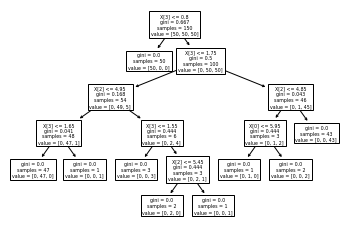

In [20]:
tree.plot_tree(clf)

我们还可以使用导出器以Graphviz格式导出树export_graphviz 。如果您使用conda包管理器，则可以使用 .graphviz 二进制文件和 python 包安装。conda install python-graphviz

或者，可以从 graphviz 项目主页下载 graphviz 的二进制文件，并使用 .pypi 从 pypi 安装 Python 包装器。pip install graphviz

下面是在整个 iris 数据集上训练的上述树的 graphviz 导出示例；结果保存在输出文件中iris.pdf：

In [23]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
#graph.view()

'iris.pdf'

导出export_graphviz器还支持各种美观选项，包括按节点的类（或回归值）对节点进行着色，以及根据需要使用显式变量和类名称。Jupyter 笔记本还会自动内联渲染这些图：

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### 绘制在 iris 数据集上训练的决策树的决策面
对于每对鸢尾花特征，决策树学习由从训练样本推断出的简单阈值规则的组合组成的决策边界。

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

显示一起训练所有特征的单个决策树的结构。

In [27]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

### Gaussian Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

<mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" display="true" tabindex="0" ctxtmenu_counter="13" style="font-size: 113.1%; position: relative;"><mjx-math display="true" class="MJX-TEX" aria-hidden="true" style="margin-left: 0px; margin-right: 0px;"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n"><mjx-c class="mjx-c28"></mjx-c></mjx-mo><mjx-msub><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D465 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-mi class="mjx-i" size="s"><mjx-c class="mjx-c1D456 TEX-I"></mjx-c></mjx-mi></mjx-script></mjx-msub><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c2223"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="4"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n"><mjx-c class="mjx-c29"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mfrac space="4"><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mn class="mjx-n"><mjx-c class="mjx-c31"></mjx-c></mjx-mn></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-msqrt><mjx-sqrt><mjx-surd><mjx-mo class="mjx-lop"><mjx-c class="mjx-c221A TEX-S2"></mjx-c></mjx-mo></mjx-surd><mjx-box style="padding-top: 0.332em;"><mjx-mn class="mjx-n"><mjx-c class="mjx-c32"></mjx-c></mjx-mn><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D70B TEX-I"></mjx-c></mjx-mi><mjx-msubsup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D70E TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.247em; margin-left: 0px;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn><mjx-spacer style="margin-top: 0.223em;"></mjx-spacer><mjx-mi class="mjx-i" size="s"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi></mjx-script></mjx-msubsup></mjx-box></mjx-sqrt></mjx-msqrt></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac><mjx-mi class="mjx-n"><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c78"></mjx-c><mjx-c class="mjx-c70"></mjx-c></mjx-mi><mjx-mo class="mjx-n"><mjx-c class="mjx-c2061"></mjx-c></mjx-mo><mjx-mrow space="2"><mjx-mo class="mjx-s4"><mjx-c class="mjx-c28 TEX-S4"></mjx-c></mjx-mo><mjx-mo class="mjx-n"><mjx-c class="mjx-c2212"></mjx-c></mjx-mo><mjx-mfrac><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mrow><mjx-mo class="mjx-n"><mjx-c class="mjx-c28"></mjx-c></mjx-mo><mjx-msub><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D465 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-mi class="mjx-i" size="s"><mjx-c class="mjx-c1D456 TEX-I"></mjx-c></mjx-mi></mjx-script></mjx-msub><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2212"></mjx-c></mjx-mo><mjx-msub space="3"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D707 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-mi class="mjx-i" size="s"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi></mjx-script></mjx-msub><mjx-msup><mjx-mo class="mjx-n"><mjx-c class="mjx-c29"></mjx-c></mjx-mo><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-mrow></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-mrow><mjx-mn class="mjx-n"><mjx-c class="mjx-c32"></mjx-c></mjx-mn><mjx-msubsup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D70E TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.247em; margin-left: 0px;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn><mjx-spacer style="margin-top: 0.223em;"></mjx-spacer><mjx-mi class="mjx-i" size="s"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi></mjx-script></mjx-msubsup></mjx-mrow></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac><mjx-mo class="mjx-s4"><mjx-c class="mjx-c29 TEX-S4"></mjx-c></mjx-mo></mjx-mrow></mjx-math><mjx-assistive-mml unselectable="on" display="block"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>P</mi><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><mo>∣</mo><mi>y</mi><mo stretchy="false">)</mo><mo>=</mo><mfrac><mn>1</mn><msqrt><mn>2</mn><mi>π</mi><msubsup><mi>σ</mi><mi>y</mi><mn>2</mn></msubsup></msqrt></mfrac><mi>exp</mi><mo data-mjx-texclass="NONE">⁡</mo><mrow data-mjx-texclass="INNER"><mo data-mjx-texclass="OPEN">(</mo><mo>−</mo><mfrac><mrow><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><mo>−</mo><msub><mi>μ</mi><mi>y</mi></msub><msup><mo stretchy="false">)</mo><mn>2</mn></msup></mrow><mrow><mn>2</mn><msubsup><mi>σ</mi><mi>y</mi><mn>2</mn></msubsup></mrow></mfrac><mo data-mjx-texclass="CLOSE">)</mo></mrow></math></mjx-assistive-mml></mjx-container>

In [ ]:
The parameters  and 
 are estimated using maximum likelihood.

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [ ]:
#write code about naive bayesian by python
